In [1]:
#Notebook for analysis 

In [51]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import pickle
import time
from skimage.measure import compare_ssim
import tensorflow as tf
from keras.models import Model,load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input, Activation
from keras.utils import to_categorical
import keras
from sklearn.metrics import accuracy_score
import random
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [52]:
with open('../subsets/subset', 'rb') as f:
    original = pickle.load(f)
    adversarial= pickle.load(f)
    original_y = pickle.load(f)
    adversarial_y = pickle.load(f)

print(f"Original shape {original.shape}")
print(f"Adversarial shape {adversarial.shape}")
print(f"Original labels shape {original_y.shape}")
print(f"Adversarial labels shape {adversarial_y.shape}")

Original shape (895, 784)
Adversarial shape (126, 784)
Original labels shape (895,)
Adversarial labels shape (126,)


In [53]:
labels = [0,1,2,3,4,5,6,7,8,9]
true= adversarial_y

In [54]:
a = np.array(adversarial_y)
unique, counts = np.unique(a, return_counts=True)
for x,y in zip(unique, counts): 
    print(f"class: {x}, percentage of samples: {round(y/sum(counts)*100,2)}% ")


class: 0, percentage of samples: 10.32% 
class: 1, percentage of samples: 11.9% 
class: 2, percentage of samples: 9.52% 
class: 3, percentage of samples: 8.73% 
class: 4, percentage of samples: 10.32% 
class: 5, percentage of samples: 9.52% 
class: 6, percentage of samples: 9.52% 
class: 7, percentage of samples: 10.32% 
class: 8, percentage of samples: 9.52% 
class: 9, percentage of samples: 10.32% 


In [55]:
counts

array([13, 15, 12, 11, 13, 12, 12, 13, 12, 13], dtype=int64)

In [56]:
# BEST PERFORMING 
# Quadrant seed 1 
# 

with open('adv_rbf_1_qua', 'rb') as f:
    evolved_examples = pickle.load(f)
    times= pickle.load(f)
    nfes= pickle.load(f)
    psnrs = pickle.load(f)
    ssim_values = pickle.load(f)
    #fitness_of_evolved = pickle.load(f)
    predicted = pickle.load(f)
    #number_of_rounds = pickle.load(f)
evolved_examples = np.array(evolved_examples)

predicted_class = []
for score in predicted:
    predicted_class.append(np.argmax(score))

report = confusion_matrix(true, predicted_class, labels)


In [60]:

#THIS IS JUST USED FOR SIMPLIITY OF PLOTTING:
with open('adv_rbf_0_un', 'rb') as f:
    evolved_examples1 = pickle.load(f)
    times1= pickle.load(f)
    nfes1= pickle.load(f)
    psnrs1 = pickle.load(f)
    ssim_values1 = pickle.load(f)
    #fitness_of_evolved = pickle.load(f)
    predicted1 = pickle.load(f)
    #number_of_rounds = pickle.load(f)
evolved_examples1 = np.array(evolved_examples1)

predicted_class1 = []
for score in predicted1:
    predicted_class1.append(np.argmax(score))


Text(0.5, 1.0, 'GA: Unifrom \n Predicted: 5')

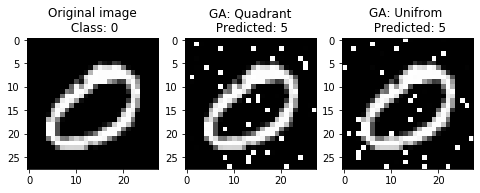

In [61]:
fd, idx =  plt.subplots(1,3)
fd.set_size_inches(8,8)
idx[0].imshow(adversarial[1].reshape(28,28),cmap="gray")
idx[1].imshow(evolved_examples[1].reshape(28,28),cmap="gray")
idx[2].imshow(evolved_examples1[1].reshape(28,28),cmap="gray")
idx[0].set_title(f"Original image\n Class: {adversarial_y[1]}")
idx[1].set_title(f"GA: Quadrant\n Predicted: {predicted_class[1]}")
idx[2].set_title(f"GA: Unifrom \n Predicted: {predicted_class1[1]}")

In [63]:
print(ssim_values[1])
print(ssim_values1[1])

0.7628110279253902
0.7882309355643835


In [62]:
predicted_class[1]-predicted_class1[1]

0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(report, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('CIFAR10 - GA: Quadrant crossover'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [20]:
# now I will try to see e.g. for class 0 , which is the most missclasified class


# Class 0 
print("Ground truth: Class 0")

ad_class0=predicted_class[0:13]
a= np.array(ad_class0)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts)) +"\n")


# Class 1
print("Ground truth: Class 1")
ad_class1=predicted_class[13:25]
a= np.array(ad_class1)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n")  


# Class 2
print("Ground truth: Class 2")
ad_class2=predicted_class[25:39]
a= np.array(ad_class2)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 3
print("Ground truth: Class 3")
ad_class3=predicted_class[39:52]
a= np.array(ad_class3)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 4
print("Ground truth: Class 4")
ad_class4=predicted_class[52:66]
a= np.array(ad_class4)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 5 
print("Class 5")
ad_class5=predicted_class[66:80]
a= np.array(ad_class5)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 6
print("Ground truth: Class 6")
ad_class6=predicted_class[79:92]
a= np.array(ad_class6)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n")  

# Class 7
print("Ground truth: Class 7 ")
ad_class7=predicted_class[93:106]
a= np.array(ad_class7)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" +str(sum(counts))  +"\n") 

# Class 8
print("Ground truth: CLass 8")
ad_class8=predicted_class[106:119]
a= np.array(ad_class8)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 9
print("Ground truth: Class 9")
ad_class9=predicted_class[119:134]
a= np.array(ad_class9)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

Ground truth: Class 0
Percentage of predicted classes after evolving (multicrossover) seed 0: 
Predicted class: 3, percentage of total predictions: 7.69% , amount of this class 1  
Predicted class: 5, percentage of total predictions: 92.31% , amount of this class 12  
13

Ground truth: Class 1
Percentage of predicted classes after evolving (multicrossover) seed 0: 
Predicted class: 1, percentage of total predictions: 8.33% , amount of this class 1  
Predicted class: 3, percentage of total predictions: 50.0% , amount of this class 6  
Predicted class: 5, percentage of total predictions: 25.0% , amount of this class 3  
Predicted class: 7, percentage of total predictions: 8.33% , amount of this class 1  
Predicted class: 8, percentage of total predictions: 8.33% , amount of this class 1  
12

Ground truth: Class 2
Percentage of predicted classes after evolving (multicrossover) seed 0: 
Predicted class: 2, percentage of total predictions: 14.29% , amount of this class 2  
Predicted class:

In [6]:
#UNIFORM , SEED 1 , CIFAR 

with open('adv_rbf_1_un', 'rb') as f:
    evolved_examples = pickle.load(f)
    times= pickle.load(f)
    nfes= pickle.load(f)
    psnrs = pickle.load(f)
    ssim_values = pickle.load(f)
    #fitness_of_evolved = pickle.load(f)
    predicted = pickle.load(f)
    #number_of_rounds = pickle.load(f)
evolved_examples = np.array(evolved_examples)

predicted_class = []
for score in predicted:
    predicted_class.append(np.argmax(score))

report = confusion_matrix(true, predicted_class, labels)

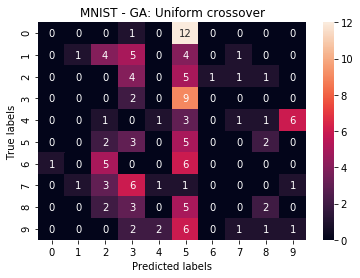

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(report, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('MNIST - GA: Uniform crossover'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

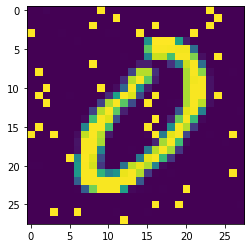

In [11]:
plt.imshow(evolved_examples[3].reshape(28,28))

In [12]:
# now I will try to see e.g. for class 0 , which is the most missclasified class

# Class 0 
print("Ground truth: Class 0")
ad_class0=predicted_class[0:13]
a= np.array(ad_class0)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts)) +"\n")


# Class 1
print("Ground truth: Class 1")
ad_class1=predicted_class[13:25]
a= np.array(ad_class1)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n")  


# Class 2
print("Ground truth: Class 2")
ad_class2=predicted_class[25:39]
a= np.array(ad_class2)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 3
print("Ground truth: Class 3")
ad_class3=predicted_class[39:52]
a= np.array(ad_class3)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 4
print("Ground truth: Class 4")
ad_class4=predicted_class[52:66]
a= np.array(ad_class4)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 5 
print("Ground truth: Class 5")
ad_class5=predicted_class[66:80]
a= np.array(ad_class5)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 6
print("Ground truth: Class 6")
ad_class6=predicted_class[79:92]
a= np.array(ad_class6)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n")  

# Class 7
print("Ground truth: Class 7 ")
ad_class7=predicted_class[93:106]
a= np.array(ad_class7)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" +str(sum(counts))  +"\n") 

# Class 8
print("Ground truth: CLass 8")
ad_class8=predicted_class[106:119]
a= np.array(ad_class8)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 9
print("Ground truth: Predicted Class 9")
ad_class9=predicted_class[119:134]
a= np.array(ad_class9)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

Ground truth: Class 0
Percentage of predicted classes after evolving (multicrossover) seed 0: 
Predicted class: 2, percentage of total predictions: 53.85% , amount of this class 7  
Predicted class: 4, percentage of total predictions: 7.69% , amount of this class 1  
Predicted class: 8, percentage of total predictions: 30.77% , amount of this class 4  
Predicted class: 9, percentage of total predictions: 7.69% , amount of this class 1  
13

Ground truth: Class 1
Percentage of predicted classes after evolving (multicrossover) seed 0: 
Predicted class: 0, percentage of total predictions: 16.67% , amount of this class 2  
Predicted class: 1, percentage of total predictions: 25.0% , amount of this class 3  
Predicted class: 6, percentage of total predictions: 8.33% , amount of this class 1  
Predicted class: 7, percentage of total predictions: 8.33% , amount of this class 1  
Predicted class: 8, percentage of total predictions: 8.33% , amount of this class 1  
Predicted class: 9, percentag

In [8]:
#change subset to cifar10
with open('../subsets/subset_cifar', 'rb') as f:
    original = pickle.load(f)
    adversarial= pickle.load(f)
    original_y = pickle.load(f)
    adversarial_y = pickle.load(f)

print(f"Original shape {original.shape}")
print(f"Adversarial shape {adversarial.shape}")
print(f"Original labels shape {original_y.shape}")
print(f"Adversarial labels shape {adversarial_y.shape}")

labels = [0,1,2,3,4,5,6,7,8,9]
true= adversarial_y

# 2K crossover , SEED 1 , CIFAR 

with open('../Improved GA/results/GA_cifar_ssim_2K_seed1', 'rb') as f:
    evolved_examples = pickle.load(f)
    times= pickle.load(f)
    ssim_values = pickle.load(f)
    fitness_of_evolved = pickle.load(f)
    predicted_class = pickle.load(f)
    number_of_rounds = pickle.load(f)
evolved_examples = np.array(evolved_examples)

Original shape (914, 32, 32, 1)
Adversarial shape (133, 32, 32, 1)
Original labels shape (914, 1)
Adversarial labels shape (133, 1)


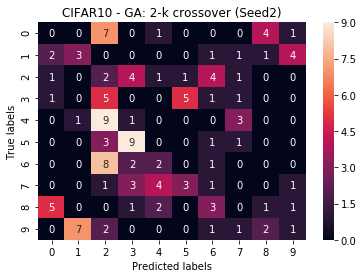

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt     

report = confusion_matrix(true, predicted_class, labels)
ax= plt.subplot()
sns.heatmap(report, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('CIFAR10 - GA: 2-k crossover (Seed2)'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [ ]:
# now I will try to see e.g. for class 0 , which is the most missclasified class

# Class 0 
print("Ground truth: Class 0")
ad_class0=predicted_class[0:13]
a= np.array(ad_class0)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts)) +"\n")


# Class 1
print("Ground truth: Class 1")
ad_class1=predicted_class[13:25]
a= np.array(ad_class1)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n")  


# Class 2
print("Ground truth: Class 2")
ad_class2=predicted_class[25:39]
a= np.array(ad_class2)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 3
print("Ground truth: Class 3")
ad_class3=predicted_class[39:52]
a= np.array(ad_class3)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 4
print("Ground truth: Class 4")
ad_class4=predicted_class[52:66]
a= np.array(ad_class4)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 5 
print("Ground truth: Class 5")
ad_class5=predicted_class[66:80]
a= np.array(ad_class5)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 6
print("Ground truth: Class 6")
ad_class6=predicted_class[79:92]
a= np.array(ad_class6)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n")  

# Class 7
print("Ground truth: Class 7 ")
ad_class7=predicted_class[93:106]
a= np.array(ad_class7)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" +str(sum(counts))  +"\n") 

# Class 8
print("Ground truth: CLass 8")
ad_class8=predicted_class[106:119]
a= np.array(ad_class8)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 

# Class 9
print("Ground truth: Predicted Class 9")
ad_class9=predicted_class[119:134]
a= np.array(ad_class9)
unique, counts = np.unique(a, return_counts=True)
print("Percentage of predicted classes after evolving (multicrossover) seed 0: ")
for x,y in zip(unique, counts): 
    print(f"Predicted class: {x}, percentage of total predictions: {round(y/sum(counts)*100,2)}% , amount of this class {y}  ")
print("" + str(sum(counts))  +"\n") 